In [1]:
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.image import imread
%matplotlib inline

In [4]:

img_path="/Users/yw18581/Downloads/File_22.tiff"
#img_path="/Users/yw18581/Documents/UoB_MAPS_Documents/Result of File_295_bkg_subtraction.tif"
image = imread (img_path)

In [5]:
image

array([[ 5134,  4804,  4943, ...,  5648,  6231,  6738],
       [ 5096,  4765,  4734, ...,  5008,  5421,  5757],
       [ 5020,  4687,  4467, ...,  4250,  4472,  4590],
       ...,
       [ 4683,  4579,  4799, ...,  7230,  7289,  7316],
       [ 8397,  8438,  8797, ..., 10256, 10273, 10296],
       [12437, 12463, 12503, ..., 13337, 13339, 13340]], dtype=uint16)

In [6]:
import matplotlib.pyplot as plt

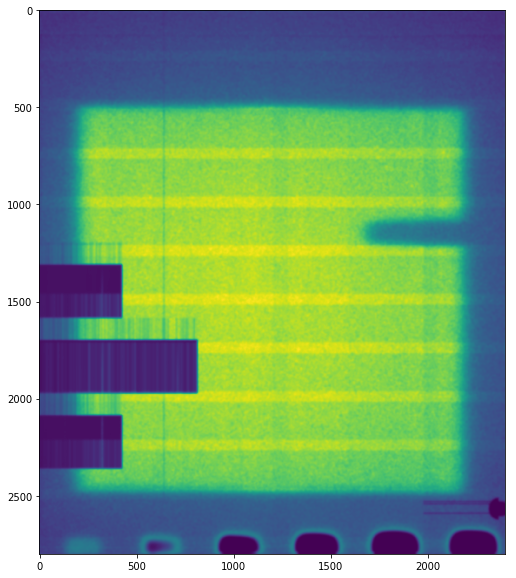

In [283]:
plt.figure(figsize=(10,10))
gaussianed=scipy.ndimage.filters.gaussian_filter(image,sigma=(5,5))
plt.imshow(gaussianed)


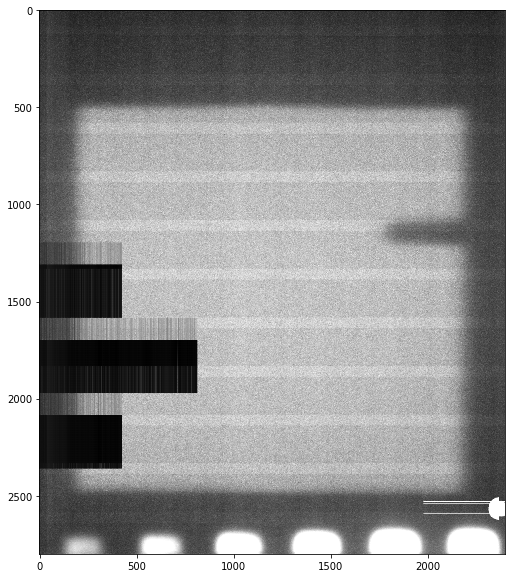

In [7]:
img = plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

In [285]:
im = scipy.misc.imread(img_path)
processed = ndimage.sobel(im, 0)
#scipy.misc.imsave('sobel.jpg', processed)
plt.imshow(processed)

/Users/yw18581/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


NameError: name 'ndimage' is not defined

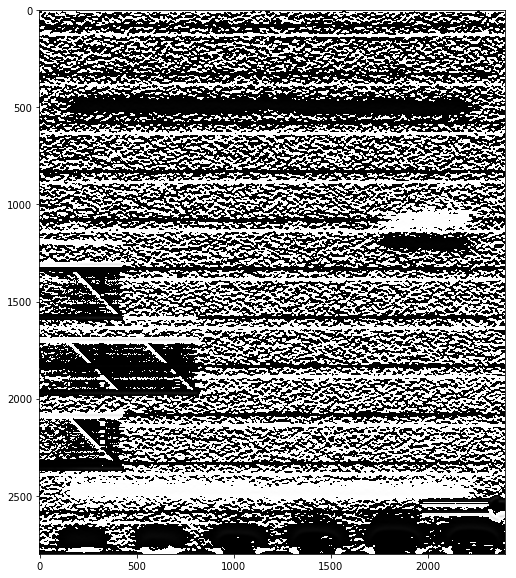

In [26]:
img = plt.figure(figsize=(10,10))
sobeled = ndimage.sobel(gaussianed,0)
plt.gray()
plt.imshow(sobeled)

In [24]:
from matplotlib.image import imread
%matplotlib inline
img_path="/Users/yw18581/Downloads/File_22.tiff"
image = imread (img_path)

In [25]:
image

array([[ 4956,  4376,  4133, ...,  5495,  7670,  7707],
       [ 6003,  5071,  3310, ...,  3839,  3814,  4856],
       [ 3664,  4653,  3747, ...,  4093,  4716,  4766],
       ...,
       [ 3783,  3576,  4147, ...,  7058,  6445,  6509],
       [ 4254,  4108,  4262, ...,  6722,  6616,  6676],
       [16383, 16383, 16383, ..., 16383, 16383, 16383]], dtype=uint16)

In [26]:
image.shape

(2800, 2400)

In [27]:
image.size

6720000

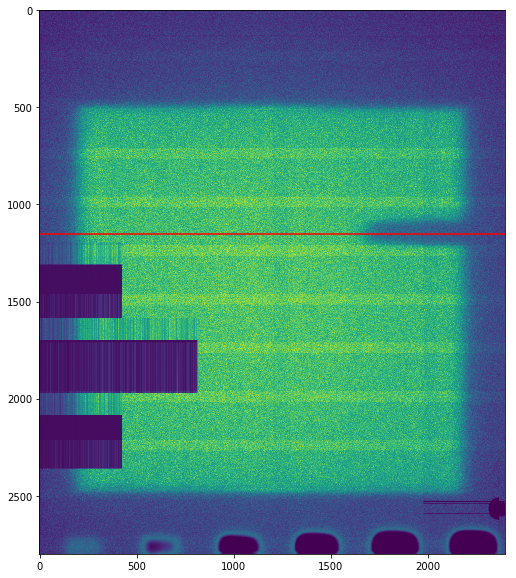

In [286]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axhline(y=1150, color='red')

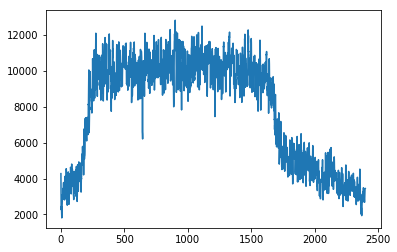

In [287]:
plt.plot(range(2400),image[1150])

In [288]:
gaussianed=scipy.ndimage.filters.gaussian_filter(image,sigma=(5,5))

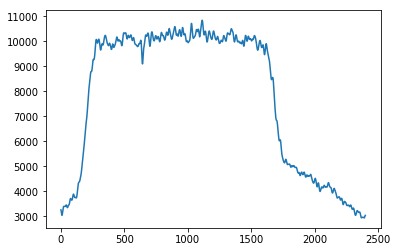

In [289]:
plt.plot(range(2400),gaussianed[1150])

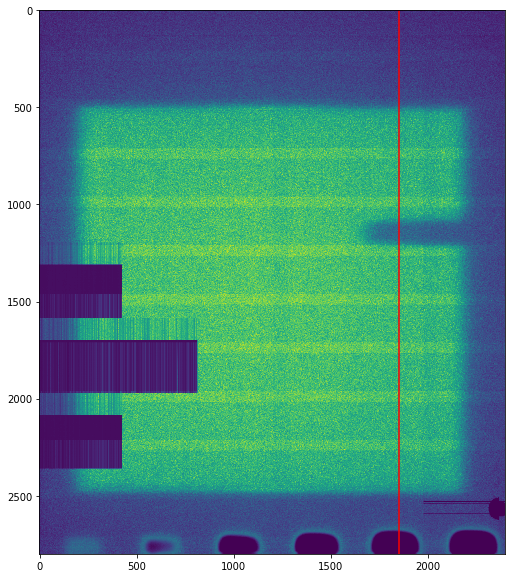

In [290]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axvline(x=1850, color='red')

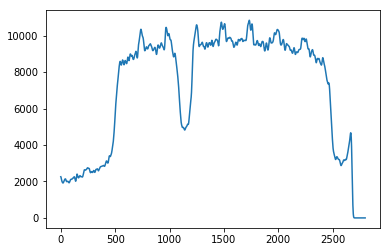

In [291]:
plt.plot(range(2800),gaussianed[:,1850])

In [292]:
from skimage import data
from skimage.exposure import histogram
coins=data.coins()
hist,hist_centers=histogram(coins)

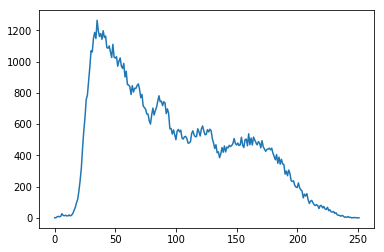

In [293]:
plt.plot(hist)

#### scikit-image segmentation tutorial

In [91]:
from skimage.feature import canny
edges=canny(coins/255.)

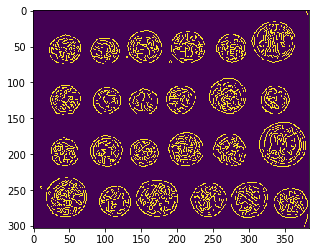

In [92]:
plt.imshow(edges)

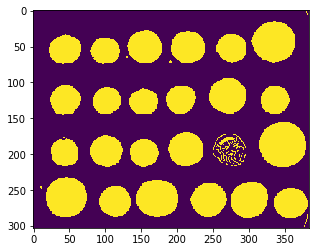

In [82]:
from scipy import ndimage as ndi
fill_coins= ndi.binary_fill_holes(edges)
plt.imshow(fill_coins)

In [87]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

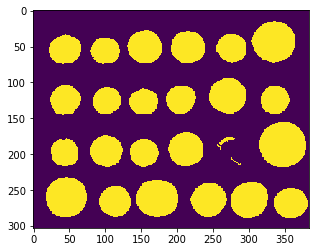

In [88]:
plt.imshow(coins_cleaned)

In [93]:
markers = np.zeros_like(coins)
markers[coins<30] = 1
markers[coins>150] =2

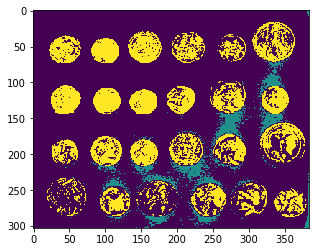

In [95]:
plt.imshow(markers)

In [94]:
from skimage.filters import sobel
elevation_map = sobel(coins)

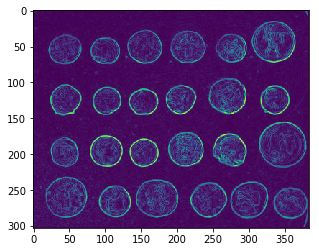

In [96]:
plt.imshow(elevation_map)

In [97]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

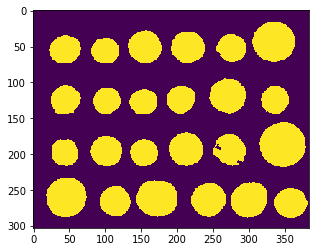

In [98]:
plt.imshow(segmentation)

In [99]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

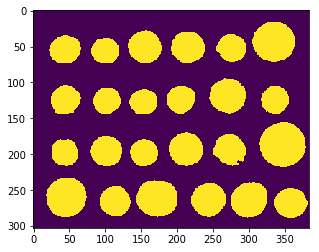

In [100]:
plt.imshow(segmentation)

In [101]:
labeled_coins, _ = ndi.label(segmentation)

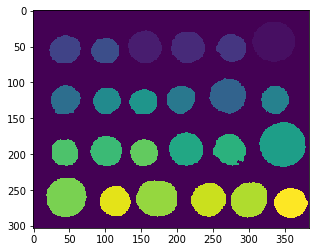

In [102]:
plt.imshow(labeled_coins)

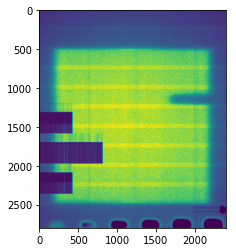

In [294]:
from matplotlib.image import imread
import scipy
%matplotlib inline
img_path="/Users/yw18581/Documents/UoB_MAPS_Documents/Result of File_295_bkg_subtraction.tif"
image = imread (img_path)
gaussianed=scipy.ndimage.filters.gaussian_filter(image,sigma=(5,5))
plt.imshow(gaussianed)
from skimage.feature import canny
edges=canny(gaussianed/255.)

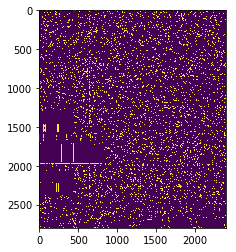

In [295]:
plt.imshow(edges)

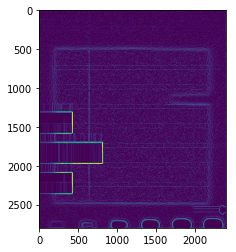

In [298]:
from skimage.filters import sobel
elevation_map = sobel(gaussianed)
plt.imshow(elevation_map)

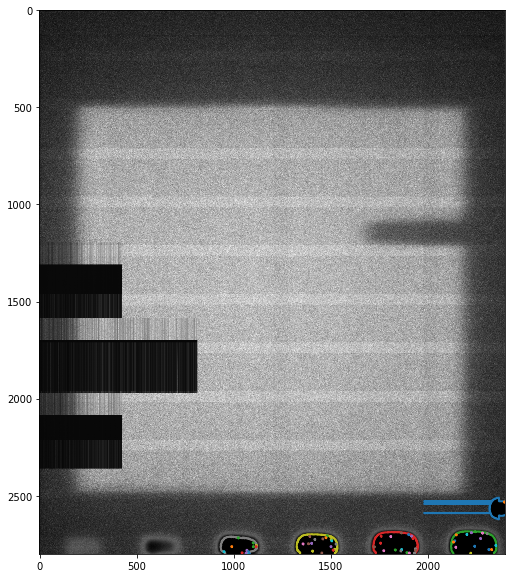

In [302]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Find contours at a constant value of 0.8
contours = measure.find_contours(image, 0.001)

# Display the image and plot all contours found
plt.figure(figsize=(10,10))
plt.imshow(image, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

[0, 512, 512, 0]

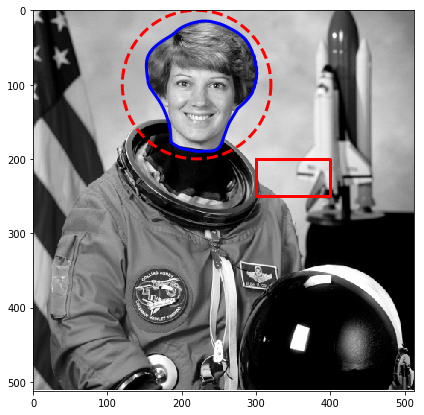

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.plot(rect[:,0],rect[:,1],'-r',lw=3)
#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

In [94]:

def get_rect(x, y, width, height, angle):
    rect = np.array([(0, 0), (width, 0), (width, height), (0, height), (0, 0)])
    theta = (np.pi / 180.0) * angle
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    offset = np.array([x, y])
    transformed_rect = np.dot(rect, R) + offset
    return transformed_rect

In [128]:
rect = get_rect(x=1650, y=1050, width=600, height=200, angle=0)

[0, 2400, 2800, 0]

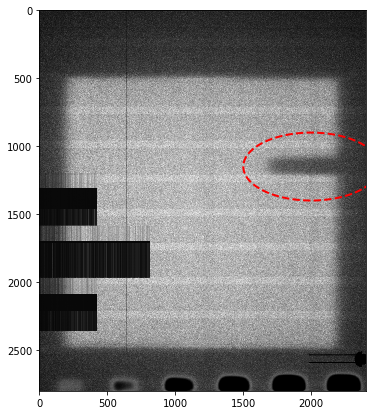

In [303]:
img = image
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 2000 + 500*np.cos(s)
y = 1150 + 250*np.sin(s)
init = np.array([x, y]).T


#init=rect
snake = active_contour(gaussian(img, 3),
                      init, alpha=10, beta=10, gamma=0.001, w_line=-1)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=2)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=2)
#ax.plot(rect[:,0],rect[:,1],'-r',lw=3)
#ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

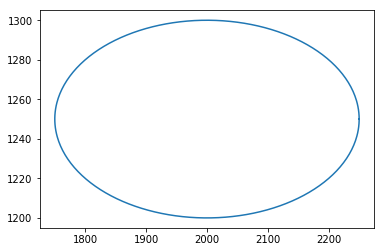

In [151]:
s = np.linspace(0, 2*np.pi, 400)
x = 2000 + 250*np.cos(s)
y = 1250 + 50*np.sin(s)
init = np.array([x, y]).T
plt.plot(init[:,0],init[:,1])

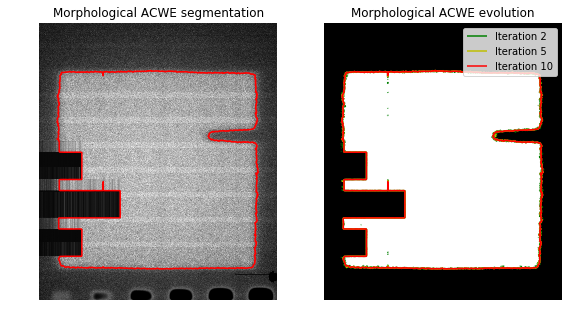

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
#image = img_as_float(data.camera())
#img_path="/Users/yw18581/Downloads/File_22.tiff"
img_path="/Users/yw18581/Documents/UoB_MAPS_Documents/Result of File_295_bkg_subtraction.tif"
image = imread (img_path)
cut = image[1000:1280,1500:]
# Initial level set
init_ls =  checkerboard_level_set(image.shape, 5)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 10, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[5], [0.5], colors='y')
contour.collections[0].set_label("Iteration 5")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 10")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)
fig.tight_layout()

plt.show()

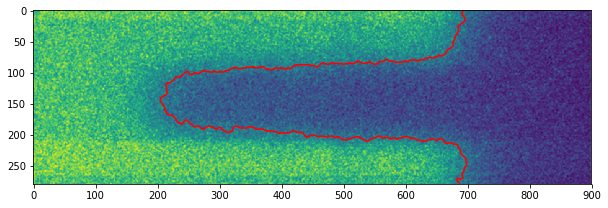

In [360]:
plt.figure(figsize=(10,10))
plt.imshow(image[1000:1280,1500:])

plt.contour(ls[1000:1280,1500:], [0.5], colors='r')
plt.show()
#plt.savefig("try.png")

In [362]:
ls[1000:1280,1500:].shape

(280, 900)

In [363]:
ls

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [ ]:
plt.contour([np.nonzero(ls[1000:1280,1500:])[0],np.nonzero(ls[1000:1280,1500:])[1]]) 

In [268]:
np.all(ls[ls!=0]==1)

True

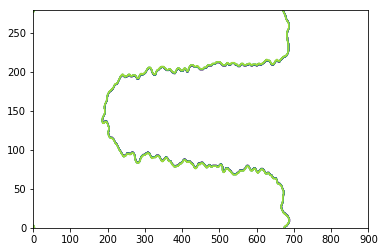

In [352]:
plt.contour(ls)

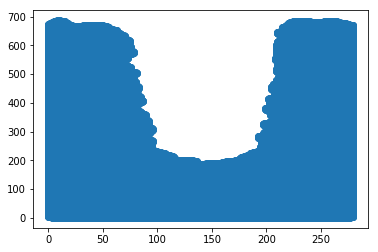

In [353]:
plt.scatter(np.nonzero(ls)[0], np.nonzero(ls)[1])

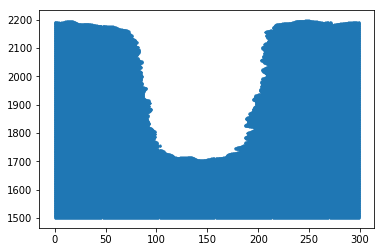

In [320]:
plt.scatter(np.nonzero(ls[1000:1300,1500:])[0], np.nonzero(ls[1000:1300,1500:])[1]+1500, s=1)

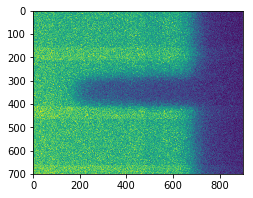

In [343]:
plt.figure(figsize=(10,3))
plt.imshow(image[800:1500,1500:])

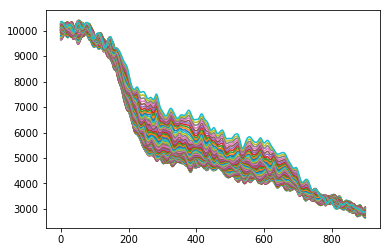

In [339]:
for i in range(100,200):
    plt.plot(gaussianed[1000:1280,1500:][i])

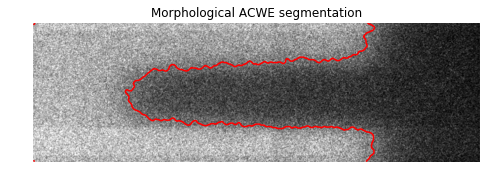

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)


img_path="/Users/yw18581/Documents/UoB_MAPS_Documents/Result of File_295_bkg_subtraction.tif"
image = imread (img_path)
cut = image[1000:1280,1500:]
# Initial level set
init_ls =  checkerboard_level_set(cut.shape, 5)
# List with intermediate results for plotting the evolution

ls_cut = morphological_chan_vese(cut, 10, init_level_set=init_ls, smoothing=3)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))


ax.imshow(cut, cmap="gray")
ax.set_axis_off()
ax.contour(ls_cut,[0.5], colors='r')
ax.set_title("Morphological ACWE segmentation", fontsize=12)

plt.show()

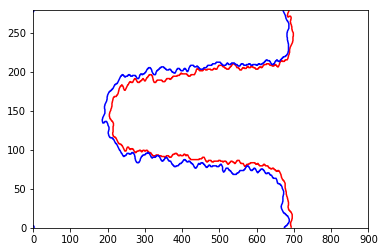

In [11]:
plt.contour(ls[1000:1280,1500:],[0.5],colors='r')
plt.contour(ls_cut,[0.5],colors='b')



In [29]:
np.nonzero(ls_cut)[0]

array([  0,   0,   0, ..., 279, 279, 279])

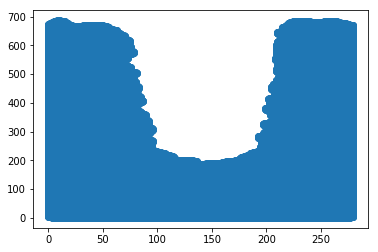

In [16]:
plt.scatter(np.nonzero(ls_cut)[0], np.nonzero(ls_cut)[1])

In [45]:
ls_cut.shape

(280, 900)

In [85]:
def select_profile(array):
    sel=[]
    for i in range(np.max(np.argwhere(array)[:,0])):
        sel.append([i,np.max(np.argwhere(array)[:,1][np.argwhere(array)[:,0]==i])])
    sel = np.asarray(sel)
    return sel

In [86]:
sel = select_profile(ls_cut)

In [95]:
sel_2 = select_profile(ls[1000:1280])

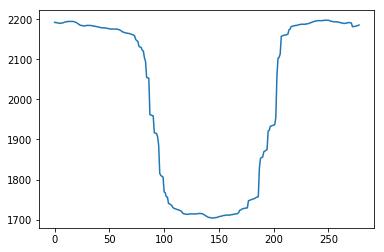

In [96]:
plt.plot(sel_2[:,0], sel_2[:,1])

In [97]:
np.min(sel_2[:,1])

1704